In [1]:
import re 
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette


import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('CSV_final_positive_sf.csv')

## NLTK Stop words

In [76]:

stop_words = stopwords.words('english')

#stop_words.extend([])

In [77]:
type(stop_words)

list

## Vectorizing & Document Matrix

In [78]:
vectorizer = CountVectorizer(stop_words='english')

docs = vectorizer.fit_transform(df.comments)

features = vectorizer.get_feature_names()


In [79]:
vectorizer2 = CountVectorizer(stop_words='english')

docs2 = vectorizer2.fit_transform(df.comments)

features = vectorizer2.get_feature_names()

In [80]:

tf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)

docs = tf.fit_transform(df['comments'])

features = tf.get_feature_names()



"\ntf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)\n\ndocs = tf.fit_transform(df['comments'])\n\nfeatures = tf.get_feature_names()\n\n"

## Read samples of reviews

In [81]:
for sample in df['spacy_doc'].sample(5).values:
    print(sample)
    print()

Chip and Angela were great hosts! The space was exactly as described and very clean. The hosts were super friendly and helpful. We would definitely stay again!

Boris has beautiful place! Clean, very spacious, in a great/ safe neighborhood. The view and the surrounding trees are lovely, quiet enough for a good nights sleep. I’m happy to have found this space. Thank you for having us!

I would definitely reccomend this place for those folks looking for a quiet and traditional San Fran neighborghood: it's quiet and no tourists so you really feel like you see how the locals live. The space was completely clean. The hosts include coffee, tea, and small food items including organic fruit which is a lovely touch. We loved our stay and it's perfect for a family or friends.

Marion’s home was PERFECT for our week in San Francisco!  Our room was spacious, comfortable, and clean.  We slept well, appreciated the fresh cotton linens, beautiful flowers, fruit & wine we found in our room apon our ar

In [82]:
for sample in df['comments'].sample(5).values:
    print(sample)
    print()

We had a wonderful stay in Leticia's house, the room was bigger than it shows in the picture, and it's cozy & clean. The location is convenient to everywhere. Leticia was easy to communicate and we love the beer she prepared for us. Thanks Leticia, hope to visit SF and stay here again soon.

We had a lovely stay! The family is lovely, very welcoming and open (and the same is true for their two cats). The room is nice and big, with a double bed and a sitting area with two couches and everything was clean. The area is nice and quiet with good bus connection (to down town and golden gate park), and restaurants nearby. We would definitely recommend staying with Jimmy and his family, and we'd definitely love to stay at their place again, if/when we come back to San Francisco. 

Hilltop Hideaway is also a true hilltop home!  A lot of heart clearly went into both the design and hospitality Katie shares with her (Website hidden by Airbnb) was a true treat to get to stay here that I hope to get

## Most Used Words

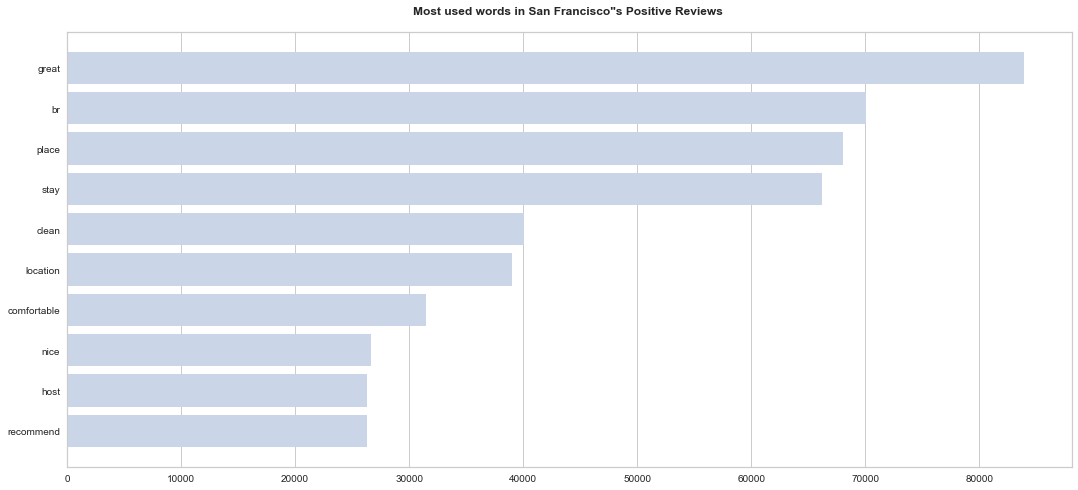

In [83]:
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('Most used words in San Francisco"s Positive Reviews \n', fontweight='bold')

##yellowbrick
vis = FreqDistVisualizer(features=features, n = 10)
vis.fit(docs)
vis.poof;

## Creating World Cloud words

In [84]:
def wordcloud_words(wordcloud):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(' San Francisco Positive Reviews\n', fontsize=18, fontweight='bold')
    plt.savefig('SFNegativeReviews')
    plt.show()

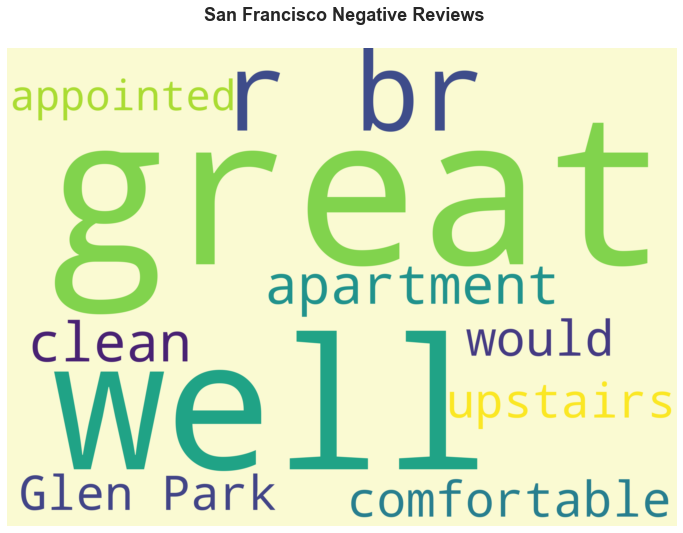

In [85]:
posWords = WordCloud(max_font_size=None, max_words = 10, background_color="lightgoldenrodyellow", 
                      width=3500, height=2500,
                      stopwords=stopwords.words('english')).generate(str(df.comments.values))

wordcloud_words(posWords)

## Simple Additional Cleaning

In [86]:
def clean(sents):
    for word in sents:
        word = re.sub('\s+', ' ', word)  
        word = re.sub("\'", "", word)  
        word = gensim.utils.simple_preprocess(str(word), deacc=True) 
        yield(word)  


# Apply cleaning

In [87]:
all_data = df.comments.values.tolist()
clean_sent = list(clean(all_data))
print(clean_sent[:1])

[['we', 'had', 'wonderful', 'time', 'staying', 'at', 'hollys', 'apartment', 'the', 'apartment', 'is', 'very', 'comfortable', 'and', 'well', 'appointed', 'and', 'located', 'in', 'great', 'part', 'of', 'san', 'francisco', 'close', 'to', 'public', 'transport', 'as', 'well', 'as', 'some', 'cool', 'cafes', 'and', 'restaurants', 'holly', 'and', 'her', 'family', 'made', 'us', 'feel', 'very', 'welcomed', 'and', 'were', 'very', 'responsive', 'and', 'helpful', 'we', 'would', 'happily', 'stay', 'there', 'again', 'and', 'would', 'highly', 'recommend', 'the', 'place', 'to', 'others']]


In [88]:
print(clean_sent[:5])

[['we', 'had', 'wonderful', 'time', 'staying', 'at', 'hollys', 'apartment', 'the', 'apartment', 'is', 'very', 'comfortable', 'and', 'well', 'appointed', 'and', 'located', 'in', 'great', 'part', 'of', 'san', 'francisco', 'close', 'to', 'public', 'transport', 'as', 'well', 'as', 'some', 'cool', 'cafes', 'and', 'restaurants', 'holly', 'and', 'her', 'family', 'made', 'us', 'feel', 'very', 'welcomed', 'and', 'were', 'very', 'responsive', 'and', 'helpful', 'we', 'would', 'happily', 'stay', 'there', 'again', 'and', 'would', 'highly', 'recommend', 'the', 'place', 'to', 'others'], ['this', 'is', 'lovely', 'basement', 'apartment', 'very', 'clean', 'and', 'everything', 'you', 'could', 'want', 'is', 'provided', 'pretty', 'garden', 'great', 'location', 'stayed', 'with', 'my', 'son', 'and', 'we', 'were', 'both', 'very', 'happy', 'to', 'have', 'chosen', 'this', 'property', 'this', 'was', 'my', 'first', 'experience', 'with', 'airbnb', 'and', 'was', 'very', 'pleased'], ['this', 'home', 'was', 'quaint',

## Bigram & Trigram

In [89]:

bi_gram = gensim.models.Phrases(clean_sent, min_count=5, threshold=100) 

tri_gram = gensim.models.Phrases(bi_gram[clean_sent], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bi_gram)

trigram_mod = gensim.models.phrases.Phraser(tri_gram)

## Clean, Remove & Lemma

In [90]:

def cleaning(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    
    nlp = spacy.load("en_core_web_sm")
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])     
    
    clean_text = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    
    return clean_text


## Apply final cleaning on prev cleaned list

In [91]:
doc_clean = cleaning(clean_sent)
doc_clean[:5]

[['wonderful',
  'time',
  'stay',
  'hollys',
  'apartment',
  'apartment',
  'comfortable',
  'well',
  'appoint',
  'locate',
  'great',
  'part',
  'close',
  'public',
  'transport',
  'well',
  'cool',
  'cafes',
  'restaurant',
  'holly',
  'family',
  'make',
  'feel',
  'welcome',
  'responsive',
  'helpful',
  'happily',
  'stay',
  'highly',
  'recommend',
  'place'],
 ['lovely',
  'basement',
  'apartment',
  'clean',
  'provide',
  'pretty',
  'garden',
  'great',
  'location',
  'stay',
  'son',
  'happy',
  'choose',
  'property',
  'first',
  'experience',
  'airbnb',
  'pleased'],
 ['home',
  'quaint',
  'amazing',
  'location',
  'studio',
  'style',
  'apartment',
  'bottom',
  'floor',
  'classic',
  'look',
  'apartment',
  'right',
  'next',
  'nice',
  'park',
  'people',
  'walk',
  'dog',
  'short',
  'uber',
  'ride',
  'sf',
  'br',
  'check',
  'unit',
  'clean',
  'host',
  'binder',
  'ready',
  'information',
  'need',
  'include',
  'password',
  'trashc

## Create Dictionary & Corpus

In [92]:
doc_dict = corpora.Dictionary(doc_clean)

corpus = [doc_dict.doc2bow(text) for text in doc_clean]


## Build The LDA model

In [93]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=8, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.073*"definitely" + 0.056*"space" + 0.056*"love" + 0.049*"area" + '
  '0.029*"go" + 0.029*"stay" + 0.026*"many" + 0.023*"experience" + '
  '0.020*"beautiful" + 0.019*"airbnb"'),
 (1,
  '0.091*"great" + 0.078*"stay" + 0.064*"place" + 0.047*"location" + '
  '0.041*"clean" + 0.032*"host" + 0.027*"recommend" + 0.025*"super" + '
  '0.024*"nice" + 0.023*"comfortable"'),
 (2,
  '0.131*"br" + 0.090*"room" + 0.033*"staff" + 0.031*"friendly" + '
  '0.029*"people" + 0.024*"touch" + 0.023*"kitchen" + 0.017*"think" + '
  '0.017*"share" + 0.016*"respond"'),
 (3,
  '0.094*"bed" + 0.035*"bathroom" + 0.027*"see" + 0.026*"comfy" + '
  '0.024*"shower" + 0.020*"window" + 0.017*"desk" + 0.017*"extra" + '
  '0.016*"equip" + 0.015*"light"'),
 (4,
  '0.045*"parking" + 0.030*"check" + 0.022*"even" + 0.021*"get" + '
  '0.019*"night" + 0.018*"look" + 0.017*"easy" + 0.015*"car" + 0.014*"day" + '
  '0.012*"garage"'),
 (5,
  '0.000*"lourde" + 0.000*"lorraine" + 0.000*"nando" + 0.000*"tom" + '
  '0.000*"ash

## List of words by topic

In [94]:
topics = lda_model.show_topics(formatted=False)

In [95]:
type(topics)

list

In [96]:
topics

[(0,
  [('definitely', 0.07266066),
   ('space', 0.056466043),
   ('love', 0.05616622),
   ('area', 0.048952155),
   ('go', 0.02940251),
   ('stay', 0.02938314),
   ('many', 0.026117874),
   ('experience', 0.023047118),
   ('beautiful', 0.01995613),
   ('airbnb', 0.019413648)]),
 (1,
  [('great', 0.09084663),
   ('stay', 0.07831571),
   ('place', 0.06353993),
   ('location', 0.047020018),
   ('clean', 0.04142605),
   ('host', 0.031770635),
   ('recommend', 0.02704836),
   ('super', 0.02472156),
   ('nice', 0.024033079),
   ('comfortable', 0.0234894)]),
 (2,
  [('br', 0.13057758),
   ('room', 0.090402305),
   ('staff', 0.032555424),
   ('friendly', 0.030861292),
   ('people', 0.029279314),
   ('touch', 0.024211798),
   ('kitchen', 0.023294698),
   ('think', 0.01670186),
   ('share', 0.016696097),
   ('respond', 0.016090807)]),
 (3,
  [('bed', 0.09389927),
   ('bathroom', 0.035029605),
   ('see', 0.026982099),
   ('comfy', 0.026304167),
   ('shower', 0.024238618),
   ('window', 0.0195788

## Visualize the words By Topic

In [97]:
#topics = lda_model.show_topics(formatted=False)

In [98]:
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

In [99]:
words_tops = []

for i, topic in topics:
    for word, weight in topic:
        words_tops.append([word, i , weight, counter[word]])
        

df_f = pd.DataFrame(words_tops, columns=['word', 'topic_n', 'most_appear', 'word_count']) 

In [100]:
df_f.sort_values('most_appear', ascending=False).head(12)

,word,topic_n,most_appear,word_count
20,br,2,0.130578,27941
30,bed,3,0.093899,18732
10,great,1,0.090847,83173
21,room,2,0.090402,27749
11,stay,1,0.078316,85661
0,definitely,0,0.072661,21699
12,place,1,0.063540,68972
1,space,0,0.056466,19745
2,love,0,0.056166,18215
3,area,0,0.048952,16314


## Word Count as Weights by Topic Visualization

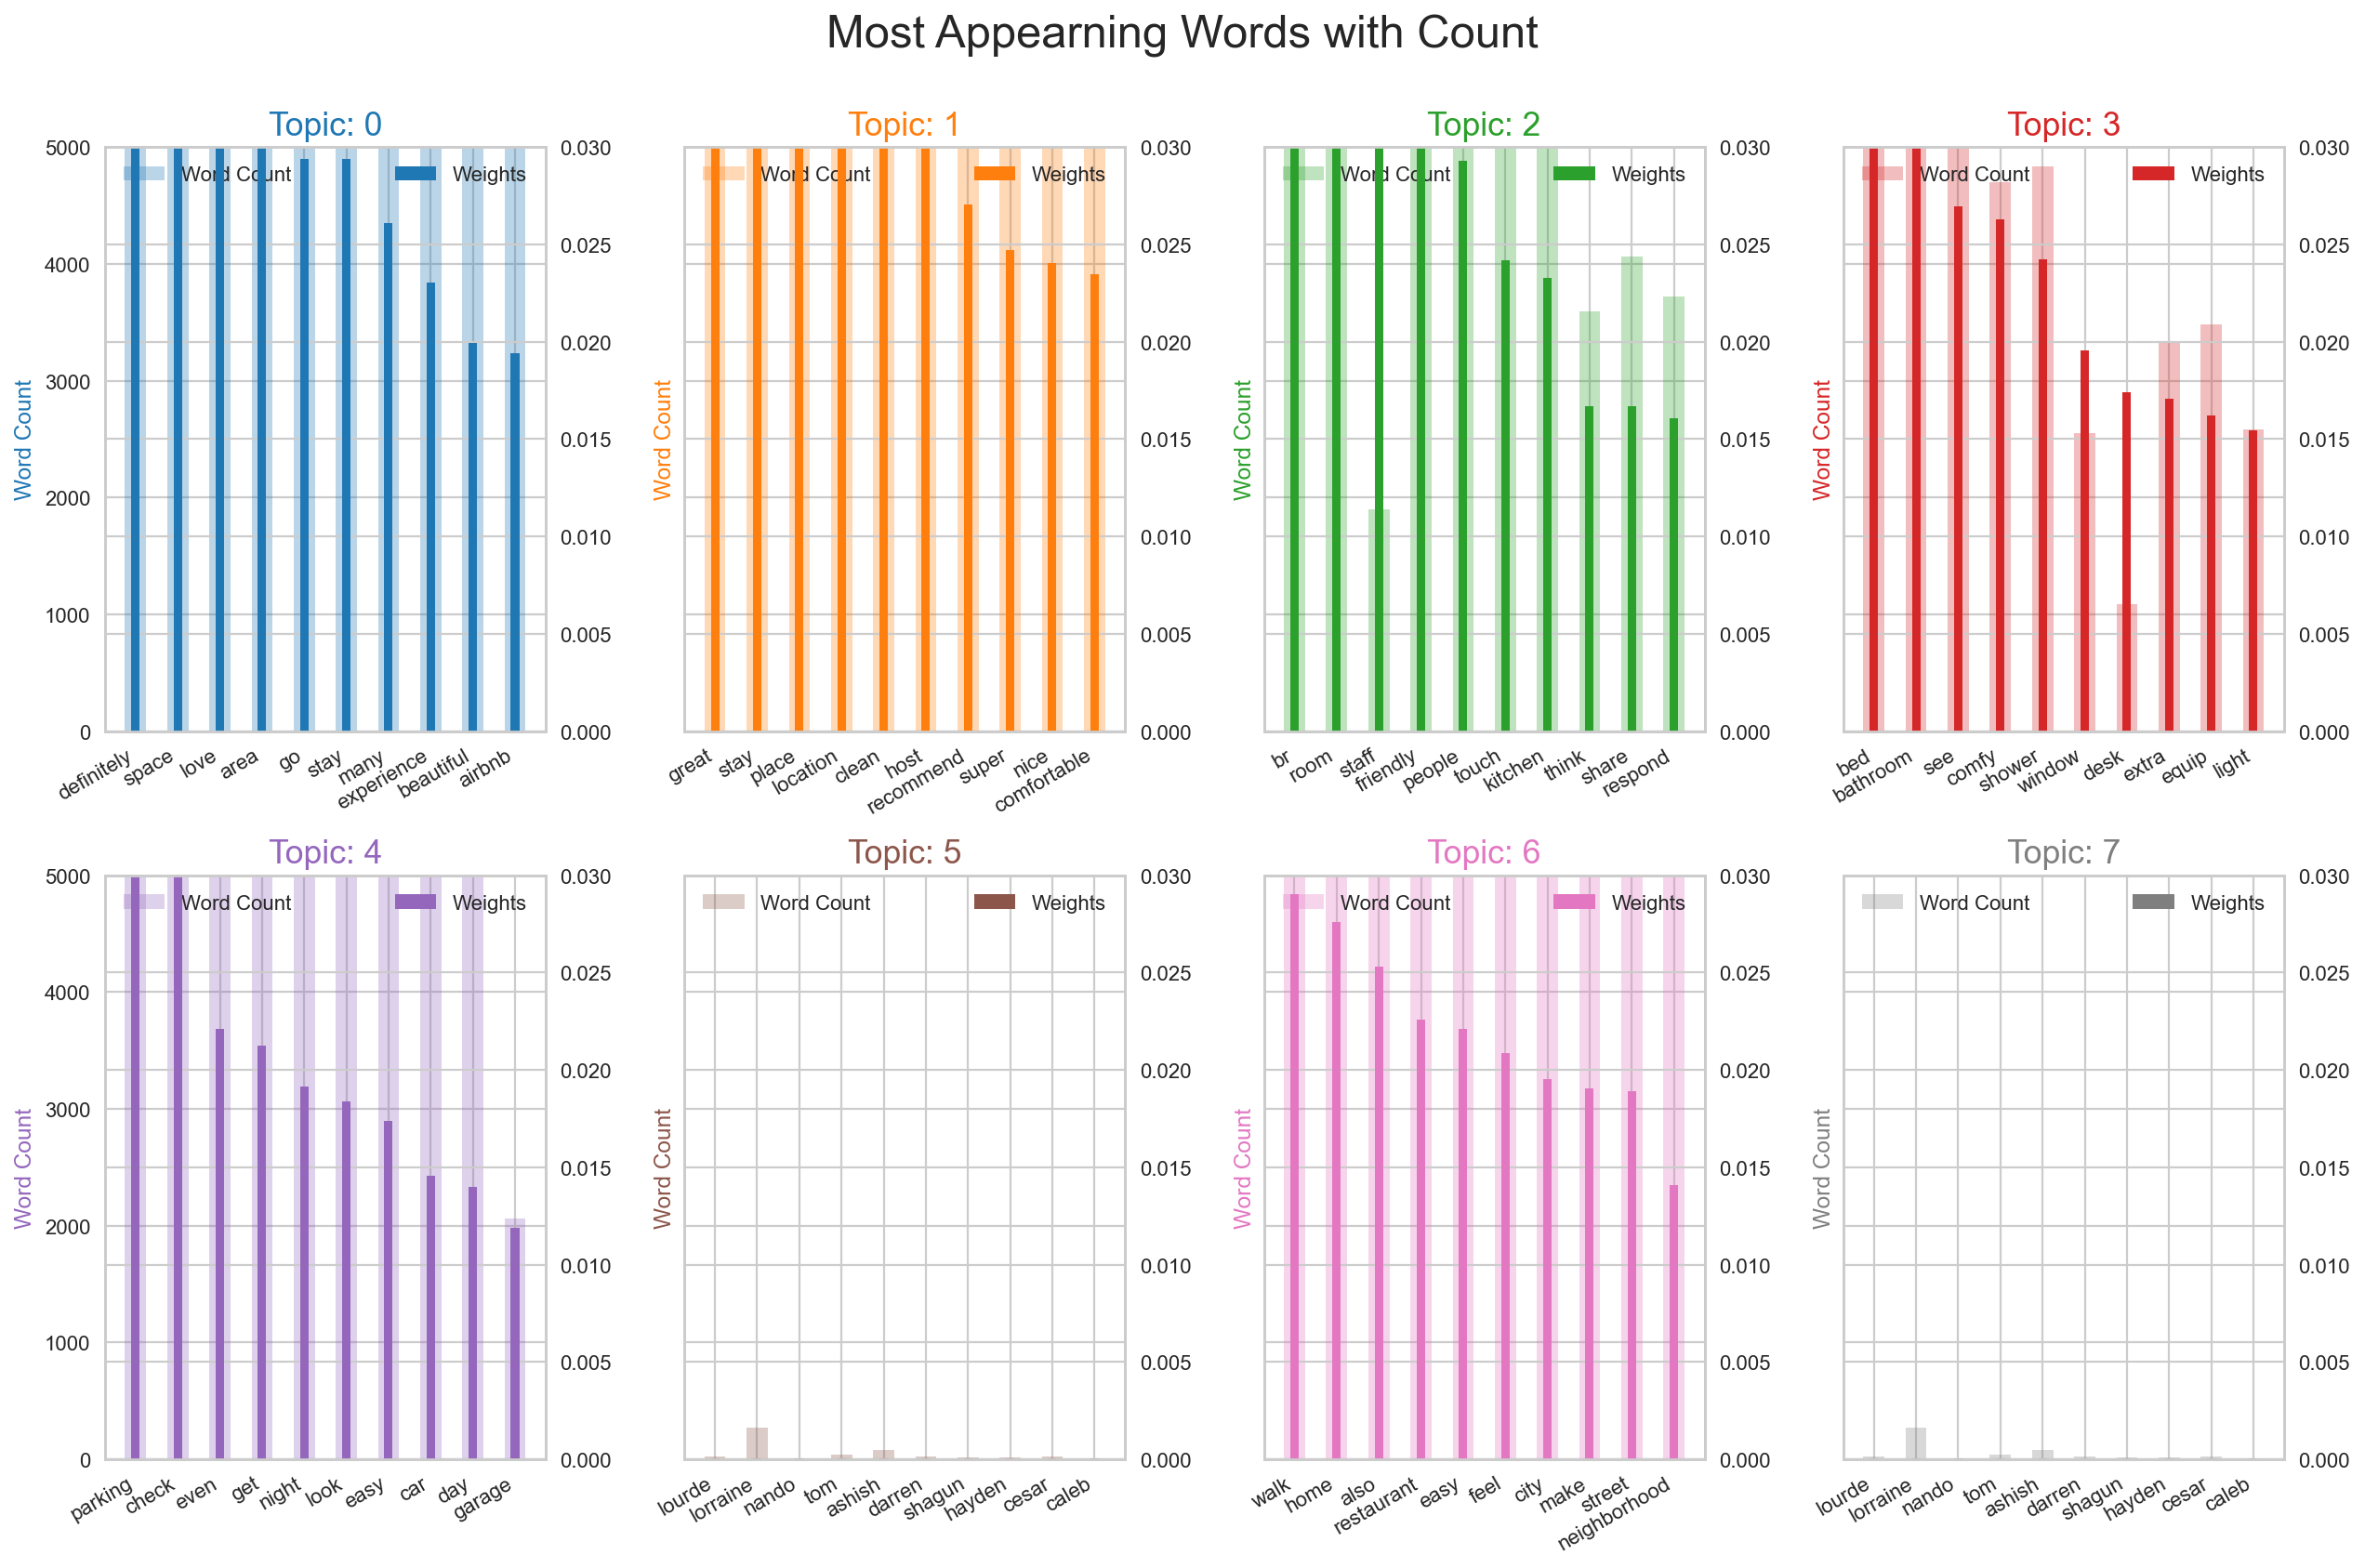

In [101]:
fig, axes = plt.subplots(2, 4, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    
    ax_twin.bar(x='word', height="most_appear", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 5000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    
    ax.set_xticklabels(df_f.loc[df_f.topic_n==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Most Appearning Words with Count', fontsize=22, y=1.05)   

plt.show()

## Words by Topic WordCloud

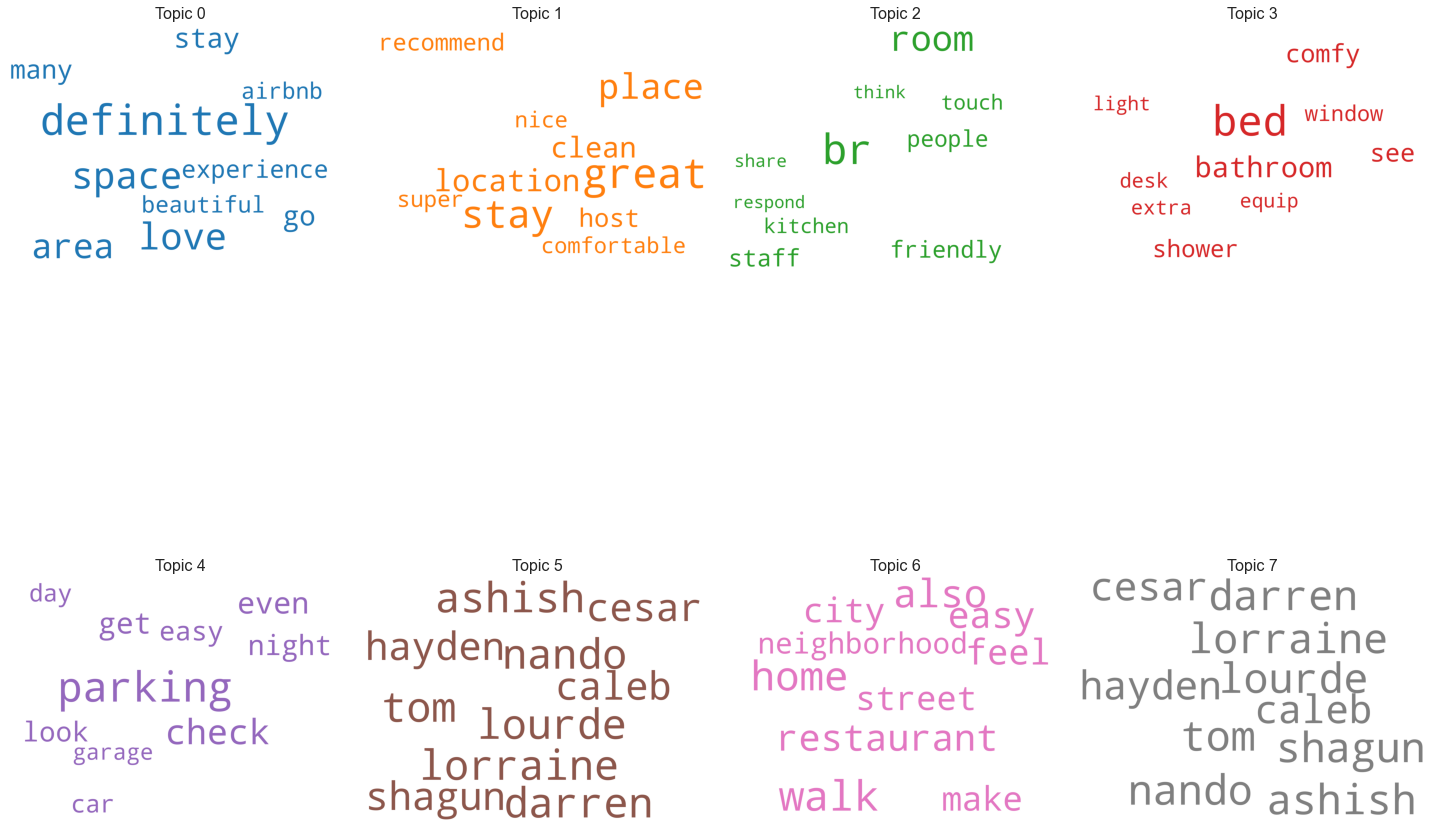

In [102]:
colors2 = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

topic_clouds = WordCloud(stopwords=stop_words,background_color='white', width=2500,height=1800, max_words=25, colormap='tab10',
                  color_func=lambda *args, **kwargs: colors2[i],prefer_horizontal=1.0)


fig, axes = plt.subplots(2, 4, figsize=(20,20), sharex=True, sharey=True)
 

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    
    topic_words = dict(topics[i][1])
    topic_clouds.generate_from_frequencies(topic_words, max_font_size=300)
    
    plt.gca().imshow(topic_clouds)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##  NMF run using 3 topics

In [103]:

nmf = NMF(n_components=3)

nmf.fit(docs)

NMF(n_components=3)

In [104]:
topic_matrix = nmf.transform(docs)

In [105]:
topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df['comments'] = df['comments']
topic_matrix_df.head()

,topic_0,topic_1,topic_2,comments
0,0.000000,0.103360,0.042262,We had a wonderful time staying at Holly's apa...
1,0.002178,0.021735,0.050864,"this is a lovely basement apartment, very clea..."
2,0.226224,0.095818,0.013797,This home was quaint and in an amazing locatio...
3,0.000000,0.186971,0.078430,Holly's apartment was the perfect place for us...
4,0.071596,0.084415,0.006627,Wonderful quiet location directly on the lovel...


In [106]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=features).T.add_prefix('topic_')
word_topic_matrix_df.head()

,topic_0,topic_1,topic_2
00,0.007280,0.008799,0.001207
000,0.001720,0.000932,0.000100
00am,0.003335,0.000518,0.002208
00m,0.000000,0.000000,0.000287
00pm,0.002301,0.002111,0.000000


## Read Samples from Topic 0 

In [144]:
for review in topic_matrix_df.sort_values(by='topic_0', ascending=False).tail(1)['comments'].values:
    print(review)
    print()

We had a wonderful time staying at Holly's apartment. The apartment is very comfortable and well appointed and located in a great part of San Francisco close to public transport as well as some cool cafes and restaurants. Holly and her family made us feel very welcomed and were very responsive and helpful. We would happily stay there again and would highly recommend the place to others.



## Read Samples from Topic 1 


In [142]:
for review in topic_matrix_df.sort_values(by='topic_1', ascending=False).head(3)['comments'].values:
    print(review)
    print()

Brian's house is a perfect place to spend some quiet time in the hearth of Castro. <br/>It's very well located and super well connected with the rest of city. The rooms are cozy and comfortable, the kitchen super well equipped, and the garden in the backyard is simply amazing. If you are looking for a cozy house to spend some time with friends and family in San Francisco this is the place you should go

nan

We really enjoyed our stay at Craig and Geoff's place. They have a great location in the Casto and Geoff gave us some great tips about how to spend our time in the city. They are very responsive in communication and super accommodating.  Highly recommend a stay at Craig and Geoff's.



## Read Samples from Topic 2


In [141]:
for review in topic_matrix_df.sort_values(by='topic_2', ascending=False).head(1)['comments'].values:
    print(review)
    print()

My experience at Clipper Cottage was exactly what I was hoping it would be, and I would be delighted to stay again on my next trip to SF.  Doug couldn’t be friendlier, and I appreciated that he did a quick check in with me on my first morning to make sure all was good. He also put a bowl of fresh fruit which I loved, especially arriving at 11:30pm. The cottage is on the backside of the house and it opens up onto a beautiful garden that gets lots of afternoon sun. The cottage is completely protected from any street noise. The bed was super comfortable.  I love Noe Valley and Clipper Street is really central — Philz Coffee is just two blocks away! Parking was very easy to come by. Great stay!



# Top 10 Words from Each Topic

In [110]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [111]:
display_topics(nmf, features, 10)


Topic  0
br, room, apartment, house, like, just, time, good, kitchen, really

Topic  1
place, stay, clean, comfortable, home, san, nice, recommend, francisco, room

Topic  2
great, location, host, clean, apartment, easy, stay, restaurants, space, close


In [112]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2
br,26.560716,0.000000,0.000000
room,1.104124,2.785930,0.851168
apartment,0.956983,2.028901,1.822972
house,0.956030,1.874039,0.382690
like,0.788534,1.755092,0.000000
just,0.761376,1.905217,0.296402
time,0.698329,1.894942,0.643045
good,0.697411,1.410412,0.511631
kitchen,0.686856,1.267773,0.394119
really,0.667771,2.406378,0.793521


In [113]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)

,topic_0,topic_1,topic_2
place,0.000000,9.678034,0.912776
stay,0.142275,8.679726,1.541028
clean,0.149406,4.048880,1.893938
comfortable,0.190161,3.554946,0.941239
home,0.627788,3.425709,0.000000
san,0.434261,3.231940,0.064198
nice,0.582461,2.876770,0.902511
recommend,0.024317,2.841247,1.110266
francisco,0.380256,2.819803,0.000000
room,1.104124,2.785930,0.851168


In [114]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)

,topic_0,topic_1,topic_2
great,0.000000,0.000000,23.125756
location,0.217059,2.107400,5.434816
host,0.356526,1.866714,2.529493
clean,0.149406,4.048880,1.893938
apartment,0.956983,2.028901,1.822972
easy,0.205454,2.316159,1.638271
stay,0.142275,8.679726,1.541028
restaurants,0.302430,1.373431,1.513189
space,0.519299,1.721562,1.229167
close,0.247863,1.327665,1.172612


In [115]:
def top_reviews(topic_matrix_df, topic, num_of_reviews):
    return (topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(num_of_reviews)['comments']
            .values)

def top_words(word_topic_matrix_df, topic, n_of_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_of_words))[topic]

In [136]:
for review in top_reviews(topic_matrix_df, 'topic_0', 1):
    print(review)
    print()

This Airbnb exceeded my expectations with it’s beautiful decor, original artwork, cozy fireplace, generous closet and drawer storage, pristine condition, and overal level of comfort and livability (I especially loved the bathroom with it’s heated flooring tile!).  For us, the location was also ideal.  It’s in a residential neighborhood where it felt safe walking our granddog that we brought back with us at night.  It’s a short drive to the airport or into the city, and we loved having easy access to the beach, Fort Funston, the SF Zoo, and Lake Mercer.    We also were pleased with the proximity of two shopping centers that had anything one might need for an extended stay.  Finding the kitchen so well equipped and both Whole Foods and Trader Joe’s within easy walking distance, I was able to bake a traditional family birthday cake in the well designed and equipped kitchen.  However, I had forgotten to pick up parchment paper and Eric graciously offered some he had on hand!  He and Peter 

In [117]:
top_words(word_topic_matrix_df, 'topic_0', 10)

br           26.560716
room          1.104124
apartment     0.956983
house         0.956030
like          0.788534
just          0.761376
time          0.698329
good          0.697411
kitchen       0.686856
really        0.667771
Name: topic_0, dtype: float64

In [139]:
for review in top_reviews(topic_matrix_df, 'topic_1', 1):
    print(review)
    print()

Brian's house is a perfect place to spend some quiet time in the hearth of Castro. <br/>It's very well located and super well connected with the rest of city. The rooms are cozy and comfortable, the kitchen super well equipped, and the garden in the backyard is simply amazing. If you are looking for a cozy house to spend some time with friends and family in San Francisco this is the place you should go



In [119]:
top_words(word_topic_matrix_df, 'topic_1', 10)

place          9.678034
stay           8.679726
clean          4.048880
comfortable    3.554946
home           3.425709
san            3.231940
nice           2.876770
recommend      2.841247
francisco      2.819803
room           2.785930
Name: topic_1, dtype: float64

In [140]:
for review in top_reviews(topic_matrix_df, 'topic_2', 1):
    print(review)
    print()

My experience at Clipper Cottage was exactly what I was hoping it would be, and I would be delighted to stay again on my next trip to SF.  Doug couldn’t be friendlier, and I appreciated that he did a quick check in with me on my first morning to make sure all was good. He also put a bowl of fresh fruit which I loved, especially arriving at 11:30pm. The cottage is on the backside of the house and it opens up onto a beautiful garden that gets lots of afternoon sun. The cottage is completely protected from any street noise. The bed was super comfortable.  I love Noe Valley and Clipper Street is really central — Philz Coffee is just two blocks away! Parking was very easy to come by. Great stay!



In [121]:
top_words(word_topic_matrix_df, 'topic_2', 10)

great          23.125756
location        5.434816
host            2.529493
clean           1.893938
apartment       1.822972
easy            1.638271
stay            1.541028
restaurants     1.513189
space           1.229167
close           1.172612
Name: topic_2, dtype: float64

In [122]:
t1 = top_words(word_topic_matrix_df, 'topic_0', 100)
t1_10 = top_words(word_topic_matrix_df, 'topic_0', 10)

In [123]:
tl_dict = t1.to_dict()

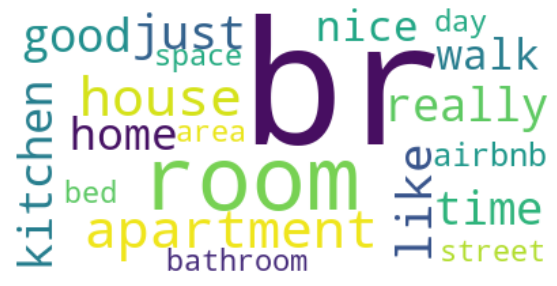

In [124]:
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(tl_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic1')
plt.show()


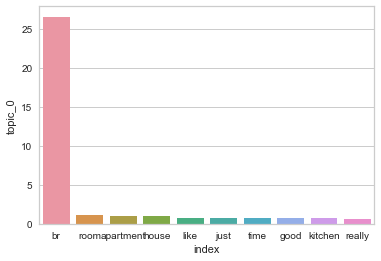

In [125]:
l_df = t1_10.to_frame()
l_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_0', data=l_df);

In [126]:
second_top = top_words(word_topic_matrix_df, 'topic_1', 100)
t2_10 = top_words(word_topic_matrix_df, 'topic_1', 10)

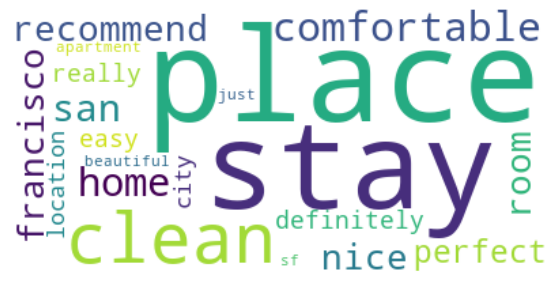

In [127]:
second_top_dict = second_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(second_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic2')
plt.show()


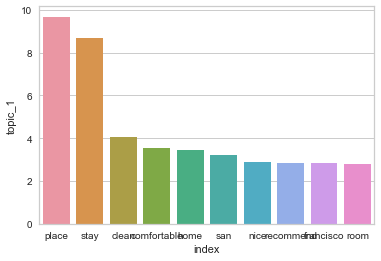

In [128]:
t2_df = t2_10.to_frame()
t2_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_1', data=t2_df);

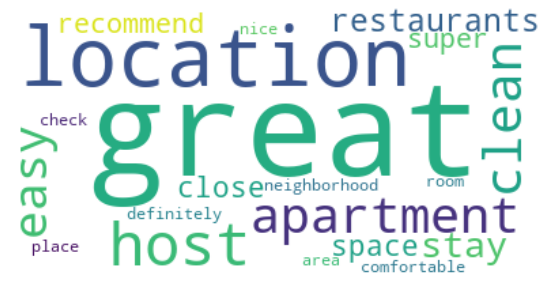

In [129]:
third_top = top_words(word_topic_matrix_df, 'topic_2', 100)
t3_10 = top_words(word_topic_matrix_df, 'topic_2', 10)


third_top_dict = third_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(third_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic3')
plt.show()

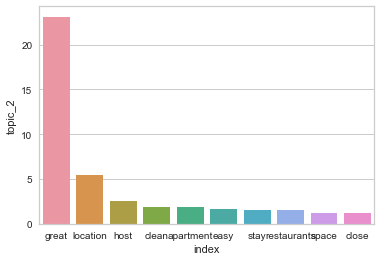

In [130]:
t3_df = t3_10.to_frame()
t3_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_2', data=t3_df);

## Build The LDA model With 5 Topics

In [131]:
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=5, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model_5.print_topics())

[(0,
  '0.078*"space" + 0.078*"love" + 0.041*"go" + 0.036*"many" + 0.025*"question" '
  '+ 0.021*"beautiful" + 0.021*"give" + 0.020*"way" + 0.019*"fantastic" + '
  '0.016*"view"'),
 (1,
  '0.053*"great" + 0.051*"stay" + 0.037*"place" + 0.027*"location" + '
  '0.024*"clean" + 0.021*"host" + 0.016*"recommend" + 0.014*"comfortable" + '
  '0.014*"easy" + 0.014*"super"'),
 (2,
  '0.053*"room" + 0.040*"bed" + 0.037*"check" + 0.031*"kitchen" + '
  '0.024*"bathroom" + 0.018*"nice" + 0.013*"bedroom" + 0.013*"coffee" + '
  '0.012*"night" + 0.011*"comfy"'),
 (3,
  '0.077*"spot" + 0.039*"kind" + 0.026*"towel" + 0.024*"price" + '
  '0.022*"detail" + 0.019*"local" + 0.019*"use" + 0.017*"perfectly" + '
  '0.016*"fast" + 0.016*"design"'),
 (4,
  '0.067*"br" + 0.023*"get" + 0.020*"walk" + 0.017*"minute" + 0.015*"people" + '
  '0.015*"value" + 0.013*"unit" + 0.013*"look" + 0.013*"garage" + '
  '0.013*"short"')]


## List of words by topic

In [132]:
topics_5 = lda_model_5.show_topics(formatted=False)

In [133]:
type(topics_5)

list

In [134]:
topics_5

[(0,
  [('space', 0.07802325),
   ('love', 0.07760902),
   ('go', 0.04062746),
   ('many', 0.036088984),
   ('question', 0.024515465),
   ('beautiful', 0.021035336),
   ('give', 0.020548588),
   ('way', 0.019928021),
   ('fantastic', 0.019251412),
   ('view', 0.01597561)]),
 (1,
  [('great', 0.052502546),
   ('stay', 0.051053517),
   ('place', 0.036721323),
   ('location', 0.027174044),
   ('clean', 0.023941156),
   ('host', 0.020540586),
   ('recommend', 0.015631944),
   ('comfortable', 0.014467332),
   ('easy', 0.014423152),
   ('super', 0.014287226)]),
 (2,
  [('room', 0.052564323),
   ('bed', 0.039586782),
   ('check', 0.03693583),
   ('kitchen', 0.03118395),
   ('bathroom', 0.024392778),
   ('nice', 0.017881636),
   ('bedroom', 0.012986841),
   ('coffee', 0.012786402),
   ('night', 0.012251989),
   ('comfy', 0.011089427)]),
 (3,
  [('spot', 0.07695572),
   ('kind', 0.03879111),
   ('towel', 0.026243946),
   ('price', 0.023682775),
   ('detail', 0.022090085),
   ('local', 0.0193447